# Data Clean

In [325]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
drop_list = {'da':'Unnamed: 0','ds':['Unnamed: 0','index']}

In [4]:
def clean_Salary(df, job_name):
    df[['low_salary','high_salary']] = df['Salary Estimate'].str.split('-', expand = True)
    df['low_salary']=df['low_salary'].str.extract('(\d+k|\d+\.\d+|\d+ \d+|\d+)')
    df['low_salary'] = df['low_salary'].fillna('-1')
    df['low_salary'] = df['low_salary'].astype('int')
    df['low_salary'] = df['low_salary']*1000
    df['high_salary']= df['high_salary'].str.extract('(\d+k|\d+\.\d+|\d+ \d+|\d+)')
    df['high_salary'] = df['high_salary'].astype('int')
    df['high_salary'] = df['high_salary']*1000

    return df


In [5]:
def clean_Company_Name(df, job_name):
    df[['Company Name','score']] = df['Company Name'].str.split('\n', expand = True)
    
    return df

In [6]:
def clean_location(df, job_name):
    df[['Location','shorthand']] = df['Location'].str.split(',', n=1 ,expand = True)
    
    return df

In [7]:
def clean_Size(df, job_name):
    df[['minimum_ppl','maximum_ppl']] = df['Size'].str.split('to', expand = True)
    df['maximum_ppl'] = df['maximum_ppl'].fillna('unknown')
    df.loc[df['maximum_ppl'] == 'unknown', 'maximum_ppl'] = df['minimum_ppl']
    df['minimum_ppl'] = df['minimum_ppl'].str.extract('(\d+|\d+\+|-\d)')
    df['maximum_ppl'] = df['maximum_ppl'].str.extract('(\d+|\d+\+|-\d)')

    return df

In [8]:
def clean_Revenue(df, job_name):
    df[['minimum_rev','maximum_rev']] = df['Revenue'].str.split('to', expand = True)
    df['maximum_rev'] = df['maximum_rev'].fillna('unknown')
    df.loc[df['maximum_rev'] == 'unknown', 'maximum_rev'] = df['minimum_rev']
    df['minimum_rev'] = df['minimum_rev'].str.replace('Unknown / Non-Applicable', '-1', regex = True )
    df['minimum_rev'] = df['minimum_rev'].str.extract('(\d+|\d+\+|-\d)')
    df['minimum_rev'] = df['minimum_rev'].astype('int')
    df['minimum_rev'] = df['minimum_rev']*1000000
    df['maximum_rev'] = df['maximum_rev'].str.replace('Unknown / Non-Applicable', '-1', regex = True )
    df['maximum_rev'] = df['maximum_rev'].str.extract('(\d+|\d+\+|-\d)')
    df['maximum_rev'] = df['maximum_rev'].astype('int')
    df['maximum_rev'] = df['maximum_rev']*1000000
    
    return df

In [9]:
def add_information(df, job_name):    
    df['minimum_ppl'] = df['minimum_ppl'].fillna(-1)
    df['maximum_ppl'] = df['maximum_ppl'].fillna(-1)
    df['company_age'] = df['Founded'].astype('int')
    df['minimum_ppl'] = df['minimum_ppl'].astype('int')
    df['maximum_ppl'] = df['maximum_ppl'].astype('int')
    df['company_age'] = 2020 - df['company_age']
    df['job_category'] = job_name
    
    return df

In [10]:
def drop_columns(df, job_name):
    if job_name in drop_list:
        df = df.drop(drop_list[job_name], axis=1, inplace=False)
    df.drop(['Salary Estimate','Size','Revenue','score'], axis=1, inplace=True)
    df = df.drop(df[df.Rating < 0].index)
    df = df.drop(df[df.Founded < 0].index)
    df = df.drop(df[df.low_salary < 0].index)
    df = df.drop(df[df.high_salary < 0].index)
    df = df.drop(df[df.minimum_ppl < 0].index)
    df = df.drop(df[df.maximum_ppl < 0].index)
    df = df.drop(df[df.maximum_ppl < 0].index)
    df = df.drop(df[df.minimum_rev < 0].index)
    df = df.drop(df[df.maximum_rev < 0].index)
    df = df.drop(df[df.Industry == '-1'].index)
  
    return df

In [11]:
def clean_datas(file_path, job_name):
    df = pd.read_csv(file_path, header=0)
    df = clean_Salary(df, job_name)
    df = clean_Company_Name(df, job_name)
    df = clean_location(df, job_name)
    df = clean_Size(df, job_name)
    df = clean_Revenue(df, job_name)
    df = add_information(df, job_name)
    df = drop_columns(df, job_name)
  
    return df

In [12]:
df_da = clean_datas('/Users/logan/Downloads/DataAnalyst.csv','da')

In [14]:
df_de = clean_datas('/Users/logan/Downloads/DataEngineer.csv','de')

In [16]:
df_ds = clean_datas('/Users/logan/Downloads/DataScientist.csv','ds')

# Date Analysis

In [18]:
merge_data = pd.concat([df_da,df_de,df_ds], ignore_index = True, sort = False)

In [97]:
Industry_da = df_da.groupby(['Industry'])["Job Title"].count().reset_index(name="count")
Industry_da = Industry_da.sort_values(by='count', ascending=False)
Industry_da = Industry_da.nlargest(5, 'count')
Industry_da['job_category']='da'


In [98]:
Sector_da = df_da.groupby(['Sector'])["Job Title"].count().reset_index(name="count")
Sector_da = Sector_da.sort_values(by='count', ascending=False)
Sector_da = Sector_da.nlargest(5, 'count')
Sector_da['job_category']='da'


In [99]:
Industry_de = df_de.groupby(['Industry'])["Job Title"].count().reset_index(name="count")
Industry_de = Industry_de.sort_values(by='count', ascending=False)
Industry_de = Industry_de.nlargest(5, 'count')
Industry_de['job_category']='de'


In [100]:
Sector_de = df_de.groupby(['Sector'])["Job Title"].count().reset_index(name="count")
Sector_de = Sector_de.sort_values(by='count', ascending=False)
Sector_de = Sector_de.nlargest(5, 'count')
Sector_de['job_category']='de'


In [96]:
Industry_ds = df_ds.groupby(['Industry'])["Job Title"].count().reset_index(name="count")
Industry_ds = Industry_ds.sort_values(by='count', ascending=False)
Industry_ds = Industry_ds.nlargest(5, 'count')
Industry_ds['job_category']='ds'


In [95]:
Sector_ds = df_ds.groupby(['Sector'])["Job Title"].count().reset_index(name="count")
Sector_ds = Sector_ds.sort_values(by='count', ascending=False)
Sector_ds = Sector_ds.nlargest(5, 'count')
Sector_ds['job_category']='ds'

In [94]:
Industry_data = pd.concat([Industry_da,Industry_de,Industry_ds], ignore_index = True, sort = False)

In [93]:
Sector_data = pd.concat([Sector_da,Sector_de,Sector_ds], ignore_index = True, sort = False)

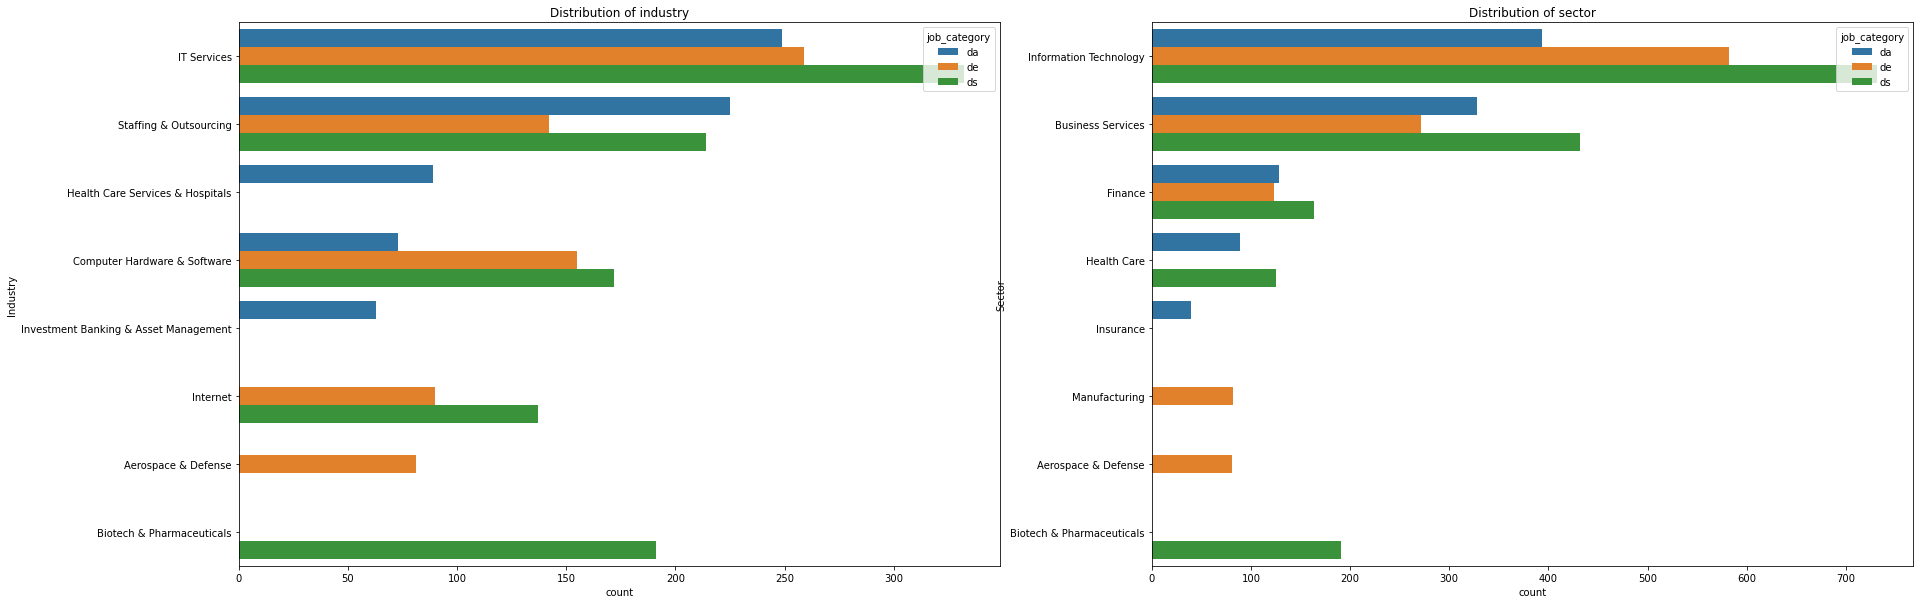

In [27]:

fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (30, 10))
axs[0].set_title('Distribution of industry')
sns.barplot(x="count", y="Industry", hue="job_category", data=Industry_data,capsize=.05, ax=axs[0])
axs[1].set_title('Distribution of sector')
sns.barplot(x="count", y="Sector", hue="job_category", data=Sector_data,capsize=.05,ax=axs[1])
plt.show()


In [121]:
df_salary_location = merge_data.loc[(merge_data['Industry']=='IT Services') & (merge_data['Sector']=='Information Technology')].groupby(['Location','shorthand'], as_index = False).mean()
df_low_salary_location = df_salary_location.sort_values(by='low_salary', ascending=True)
df_low_salary_location = df_low_salary_location[['Location','shorthand','low_salary','high_salary']].reset_index()
df_low_salary_location['shorthand'] = df_low_salary_location['shorthand'].str.strip()

In [140]:
import plotly.graph_objects as go

import pandas as pd

df = df_low_salary_location


fig = go.Figure(data=go.Choropleth(
    locations=df['shorthand'], # Spatial coordinates
    z = df['low_salary'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "low_salary $",
))

fig.update_layout(
    title_text = 'US of low_salary by State',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

In [123]:
df_high_salary_location = df_salary_location.sort_values(by='high_salary',ascending=True)
df_high_salary_location = df_high_salary_location[['shorthand','low_salary','high_salary']].reset_index()
df_high_salary_location['shorthand'] = df_high_salary_location['shorthand'].str.strip()

In [141]:
import plotly.graph_objects as go

import pandas as pd

df = df_high_salary_location


fig = go.Figure(data=go.Choropleth(
    locations=df['shorthand'], # Spatial coordinates
    z = df['high_salary'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'greens',
    colorbar_title = "high_salary $",
))

fig.update_layout(
    title_text = 'US of high_salary by State',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

In [215]:
df_ca_Industry = merge_data.loc[merge_data['shorthand'].str.contains('CA')]
df_ca_Industry_count = df_ca_Industry.groupby(['Industry','Sector'])["Industry"].count().reset_index(name="count")
df_ca_Industry_count = df_ca_Industry_count.sort_values(by='count', ascending=False).head(6)


In [216]:
location_data = df_ca_Industry.groupby(['Location']).low_salary.agg(['count','mean']).reset_index()

location_data_top6 = location_data.sort_values(by='count', ascending=False).head(6)

[None, Text(0.5, 1.0, 'Hot city in CA state')]

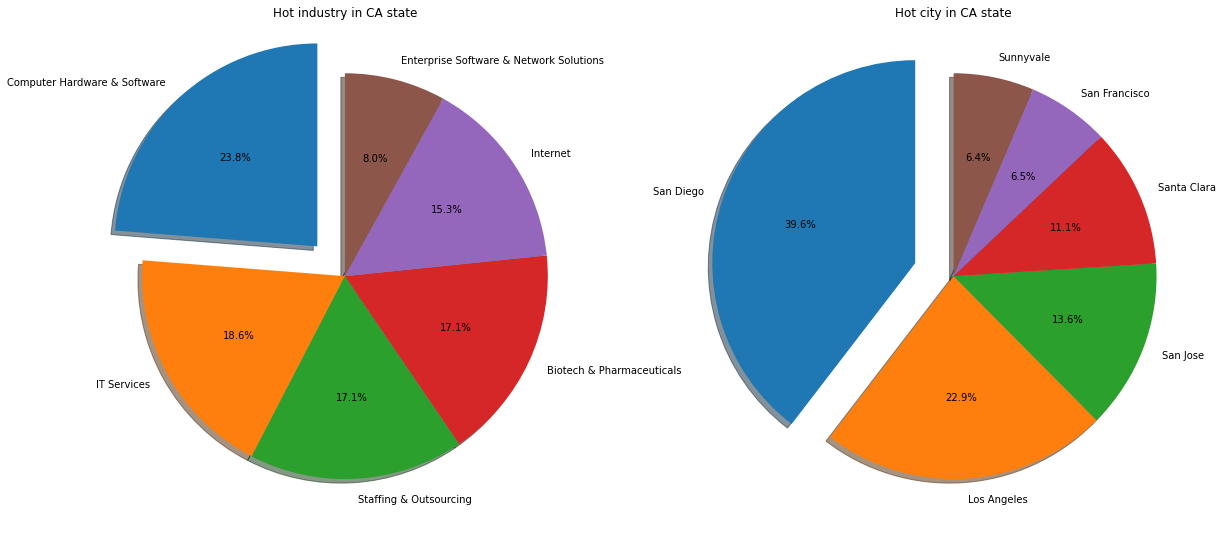

In [224]:


# Make figure and axes
fig, axs = plt.subplots(1, 2, figsize = (20, 10))

# A standard pie plot
axs[0].pie(df_ca_Industry_count['count'], explode =(0.2,0,0,0,0,0), labels=df_ca_Industry_count['Industry'], autopct='%1.1f%%',
        shadow=True, startangle=90)
axs[0].set(aspect="equal", title='Hot industry in CA state')


# Shift the second slice using explode
axs[1].pie(location_data_top6['count'], explode =(0.2,0,0,0,0,0), labels=location_data_top6['Location'], autopct='%1.1f%%',
        shadow=True, startangle=90)
axs[1].set(aspect="equal", title='Hot city in CA state')


In [273]:
df_category_salary = merge_data.groupby(['job_category'], as_index = False).mean(['low_salary'])

df_category_salary

,job_category,Rating,Founded,low_salary,high_salary,minimum_ppl,maximum_ppl,minimum_rev,maximum_rev,company_age
0,da,3.739303,1974.447761,53703.980100,88989.220564,3278.802653,4572.180763,6.117745e+07,1.108391e+08,45.552239
1,de,3.805325,1976.634163,76860.304288,123930.152144,4149.304288,5390.318119,5.050692e+07,1.118001e+08,43.365837
2,ds,3.775237,1965.370739,81839.488636,134065.814394,4717.497633,5904.900568,5.034896e+07,9.243561e+07,54.629261


<AxesSubplot:title={'center':'average maximum_rev'}, xlabel='job_category', ylabel='maximum_rev'>

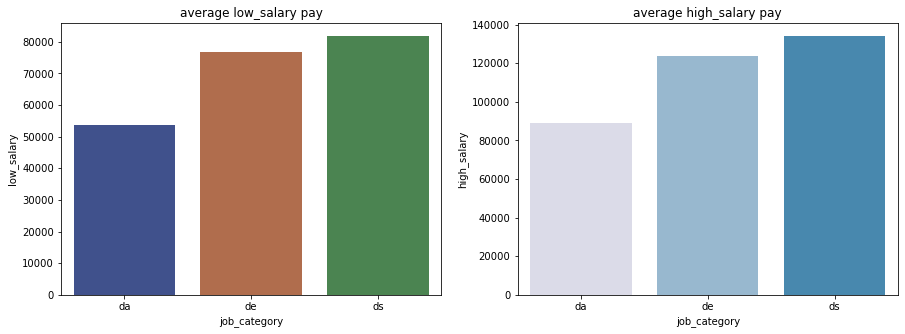

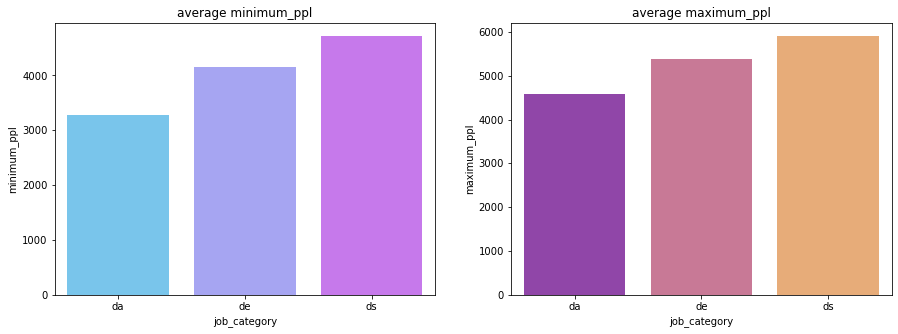

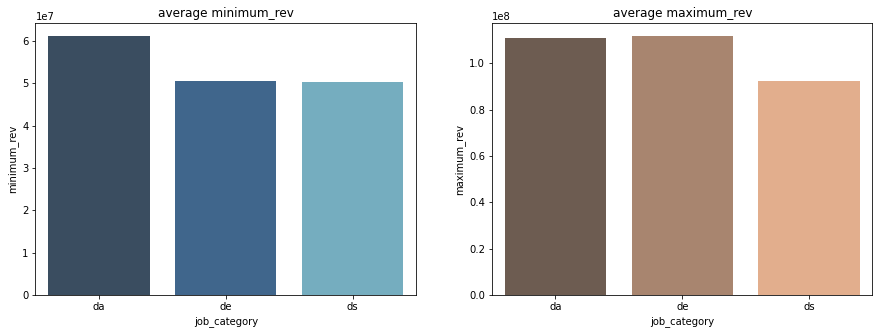

In [300]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))
axs[0].set_title('average low_salary pay')
sns.barplot(data=df_category_salary, x='job_category', y="low_salary",  ci="sd", palette="dark", alpha=.8, ax=axs[0])
axs[1].set_title('average high_salary pay')
sns.barplot(data=df_category_salary, x="job_category", y="high_salary", ci="sd", palette="PuBu", alpha=.8, ax=axs[1])
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))
axs[0].set_title('average minimum_ppl')
sns.barplot(data=df_category_salary, x='job_category', y="minimum_ppl",  ci="sd", palette="cool", alpha=.8, ax=axs[0])
axs[1].set_title('average maximum_ppl')
sns.barplot(data=df_category_salary, x='job_category', y="maximum_ppl",  ci="sd", palette="plasma", alpha=.8, ax=axs[1])
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))
axs[0].set_title('average minimum_rev')
sns.barplot(data=df_category_salary, x='job_category', y="minimum_rev",  ci="sd", palette="ocean", alpha=.8, ax=axs[0])
axs[1].set_title('average maximum_rev')
sns.barplot(data=df_category_salary, x='job_category', y="maximum_rev",  ci="sd", palette="copper", alpha=.8, ax=axs[1])




<AxesSubplot:xlabel='maximum_ppl', ylabel='high_salary'>

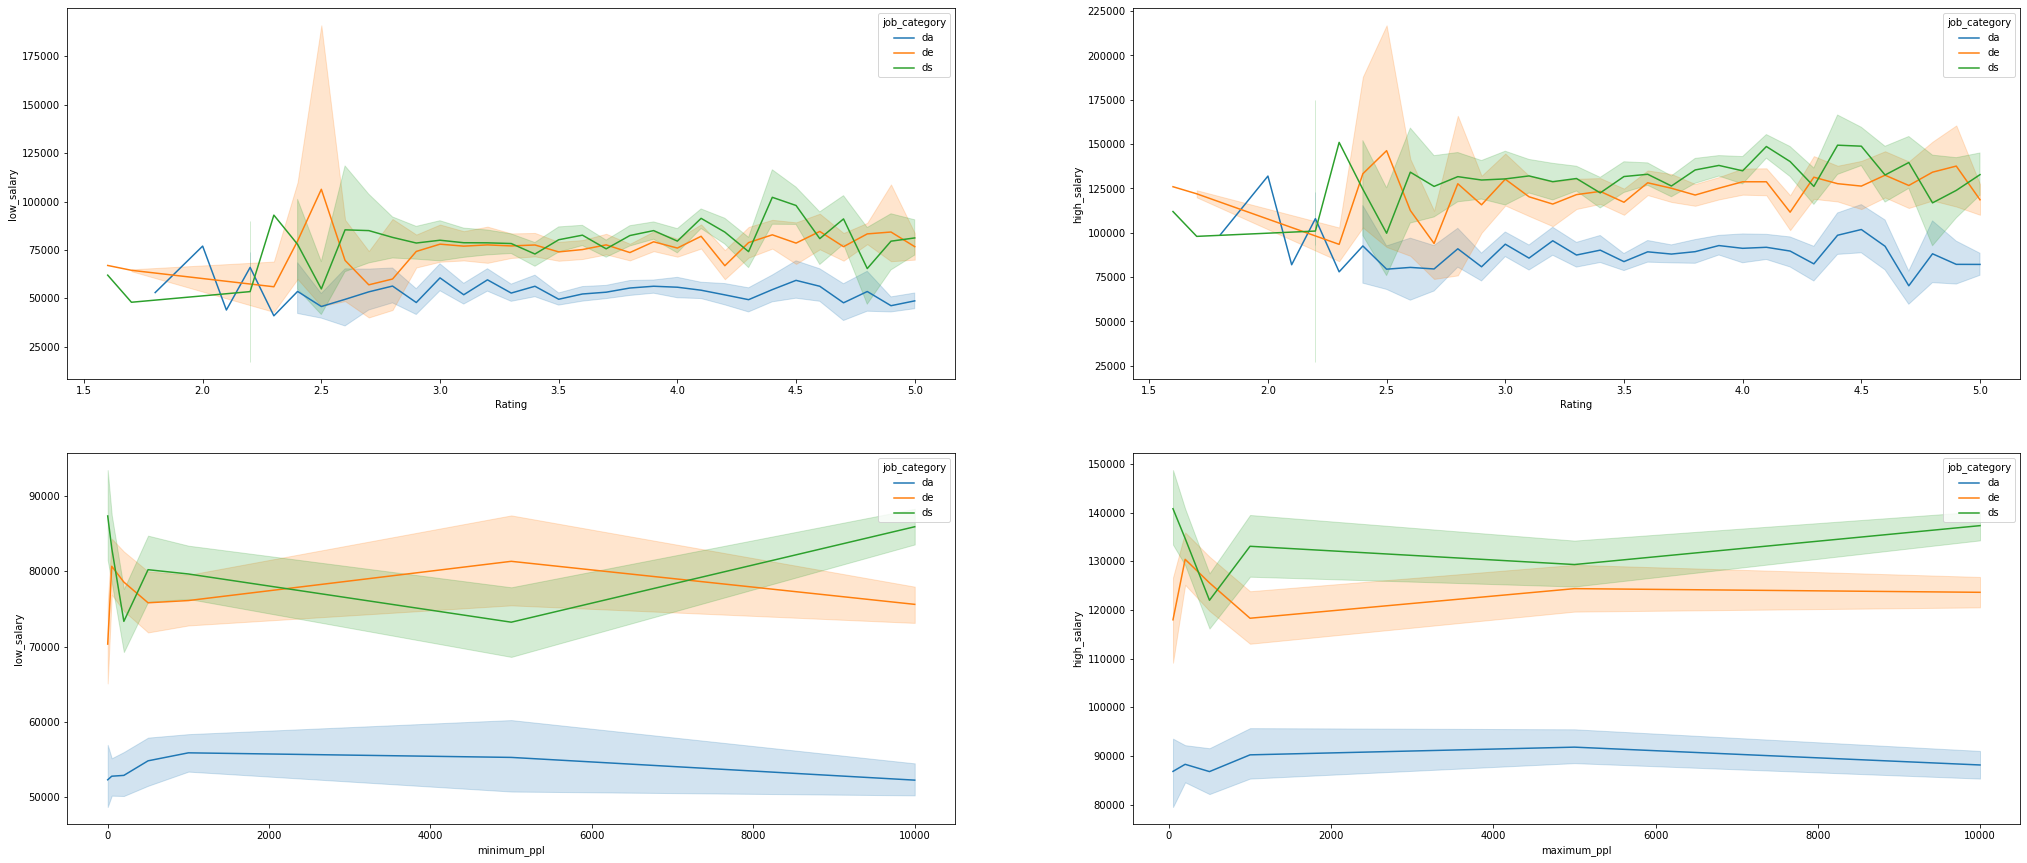

In [237]:
plt.figure(figsize=(35,15))
plt.subplot(2,2,1)
sns.lineplot(x = 'Rating', y = 'low_salary', data = merge_data, hue= 'job_category')

plt.subplot(2,2,2)
sns.lineplot(x = 'Rating', y = 'high_salary', data = merge_data, hue= 'job_category')

plt.subplot(2,2,3)
sns.lineplot(x = 'minimum_ppl', y = 'low_salary', data = merge_data, hue= 'job_category')

plt.subplot(2,2,4)
sns.lineplot(x = 'maximum_ppl', y = 'high_salary', data = merge_data, hue= 'job_category')


<AxesSubplot:title={'center':'ds'}, ylabel='Count'>

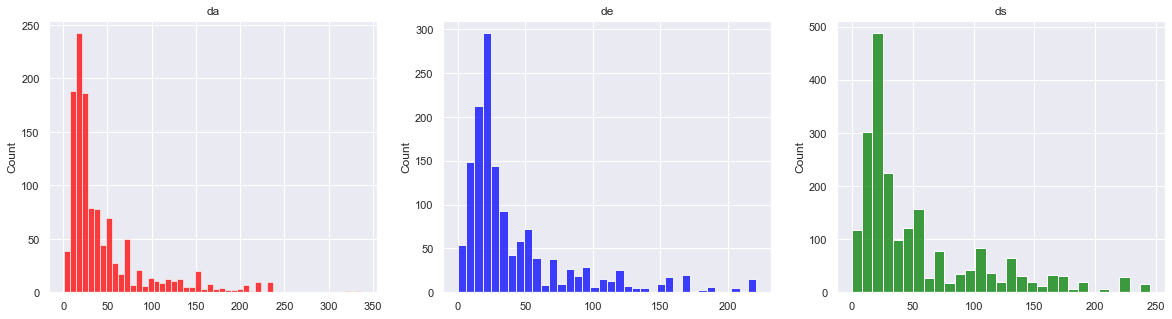

In [881]:
x = df_da['company_age'].values
y = df_de['company_age'].values
z = df_ds['company_age'].values

fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 5))
axs[0].set_title('da')
sns.histplot(x, color = 'red',ax=axs[0])
axs[1].set_title('de')
sns.histplot(y, color = 'blue',ax=axs[1])
axs[2].set_title('ds')
sns.histplot(z, color = 'green',ax=axs[2])


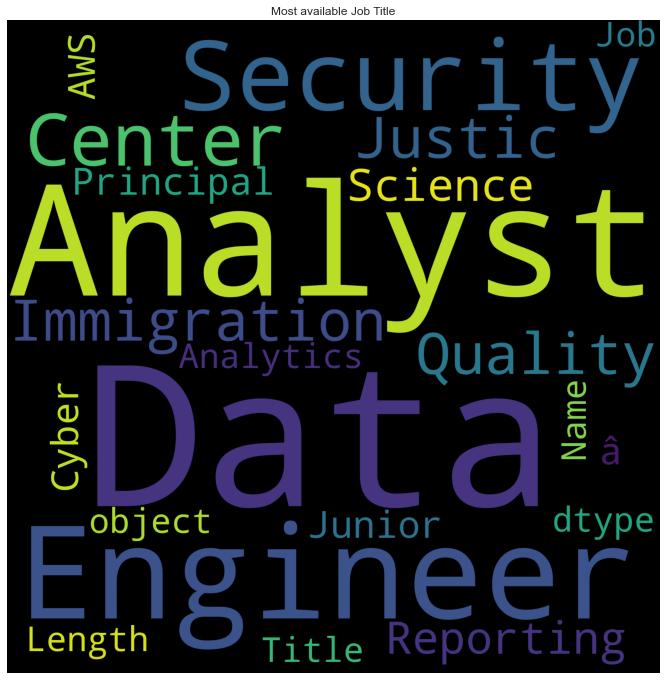

In [885]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'black',
                      height =2000,
                      width = 2000
                     ).generate(str(merge_data["Job Title"]))
plt.rcParams['figure.figsize'] = (12,12)
plt.axis("off")
plt.imshow(wordcloud)
plt.title("Most available Job Title")
plt.show()

# Machine Learning

In [308]:
x_df = merge_data[['Job Title', 'Rating', 'Location','Company Name','Type of ownership','Industry','Sector','company_age','job_category']]
#x_df = result_df[['location','Domain']]
y_df = merge_data['high_salary']

In [309]:
#Encoding qualitative data
from sklearn.preprocessing import LabelEncoder

x_df = x_df.apply(LabelEncoder().fit_transform)
#x_df[['Job title','company name','location','Domain']] = x_df[['Job title','company name','location','Domain']].apply(LabelEncoder().fit_transform)

In [311]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.3, random_state=0)

In [328]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, x_df, y_df, cv=5, scoring='r2')
    return pred

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [313]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

LinearRegression(normalize=True)

In [314]:
print(lin_reg.intercept_)

70446.36627413261


In [315]:
coeff_df = pd.DataFrame(lin_reg.coef_, x_df.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Job Title,1.204313
Rating,462.143005
Location,118.797736
Company Name,-1.190779
Type of ownership,179.315393
Industry,-108.898940
Sector,696.561245
company_age,-46.292472
job_category,20852.615624


In [316]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [317]:
pred = lin_reg.predict(X_test)

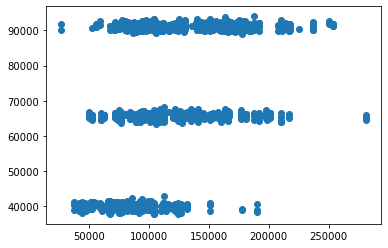

In [318]:
plt.scatter(y_test, pred)

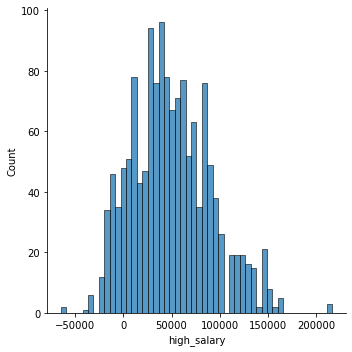

In [319]:
sns.displot((y_test - pred), bins=50);

In [336]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2002 is different from 9)

In [335]:
evaluate_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
evaluate_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,29187.269779,1.429272e+09,37805.71694,0.291402,"[-0.25199705509679826, 0.04458287798602867, -0..."


In [331]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=5)

X_train_2_d = poly_reg.fit_transform(X_train)
X_test_2_d = poly_reg.transform(X_test)

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train_2_d,y_train)

test_pred = lin_reg.predict(X_test_2_d)
train_pred = lin_reg.predict(X_train_2_d)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 154693.11931818182
MSE: 565214419322.083
RMSE: 751807.4350005345
R2 Square -279.2194784505785
Train set evaluation:
_____________________________________
MAE: 16036.213819736053
MSE: 514494850.39726585
RMSE: 22682.478929721634
R2 Square 0.725629008503445


In [333]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=500)
rf_reg.fit(X_train, y_train)

test_pred = rf_reg.predict(X_test)
train_pred = rf_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 29187.26977850432
MSE: 1429272233.3619695
RMSE: 37805.71694019265
R2 Square 0.29140180061762166
Train set evaluation:
_____________________________________
MAE: 10358.309370701618
MSE: 180341900.45306396
RMSE: 13429.143697684673
R2 Square 0.903826858524485


In [332]:
evaluate_df_random_forest = pd.DataFrame(data=[["Random Forest Regression", *evaluate(y_test, test_pred) , cross_val(RandomForestRegressor())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
evaluate_df_random_forest

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Random Forest Regression,154693.119318,5.652144e+11,751807.435001,-279.219478,"[0.03852904992037243, -0.043183062829320384, 0..."


In [337]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

### Gradient boost

In [338]:
X_train, X_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.3, random_state=13)

In [339]:
from sklearn.ensemble import GradientBoostingRegressor

params = {'n_estimators': 1000,
          'max_depth': 6,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'huber'}

gb_reg = GradientBoostingRegressor(**params)
gb_reg.fit(X_train, y_train)

test_pred = gb_reg.predict(X_test)
train_pred = gb_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 28099.60539438989
MSE: 1317388666.961546
RMSE: 36295.8491698644
R2 Square 0.3269925808725226
Train set evaluation:
_____________________________________
MAE: 18847.322171367563
MSE: 632283665.9160017
RMSE: 25145.2513591732
R2 Square 0.6672032857324857


In [340]:
evaluate_df_gb = pd.DataFrame(data=[["GradientBoostingRegressor", *evaluate(y_test, test_pred) , cross_val(GradientBoostingRegressor())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
evaluate_df_gb

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,GradientBoostingRegressor,28099.605394,1.317389e+09,36295.84917,0.326993,"[-0.03444562291881814, 0.1573902348562023, 0.1..."


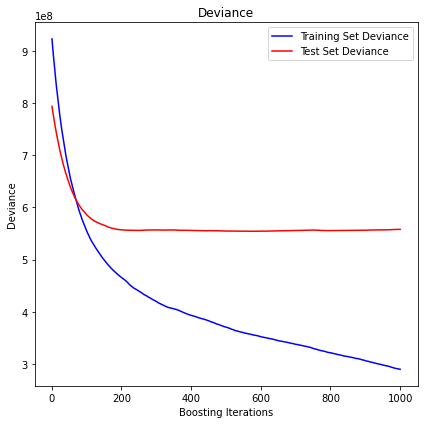

In [341]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(gb_reg.staged_predict(X_test)):
    test_score[i] = gb_reg.loss_(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, gb_reg.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

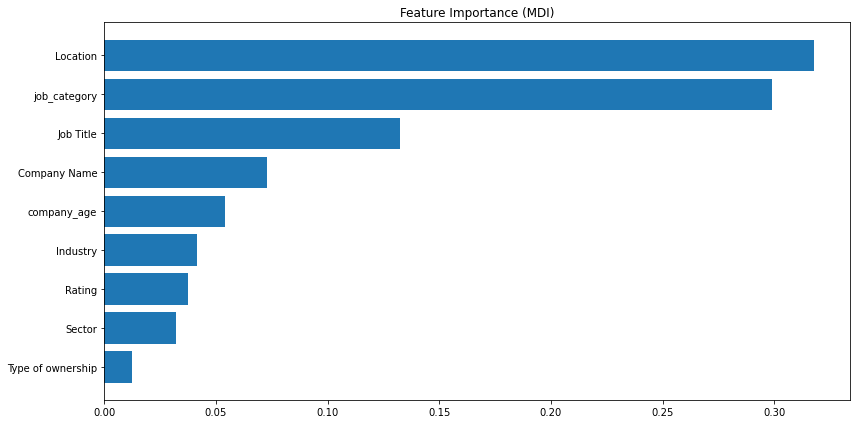

In [342]:
feature_importance = gb_reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 1, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(x_df.columns)[sorted_idx])
plt.title('Feature Importance (MDI)')
fig.tight_layout()
plt.show()